# Matplotlib Parte 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["espécie"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.shape

(150, 5)

In [6]:
df = pd.DataFrame(df)
df

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Alternativa 1 para condicionar os pontos do gráfico à cores específicas

cond = [(df["espécie"] == 'Iris-setosa'), (df["espécie"] =='Iris-versicolor'), (df["espécie"] =='Iris-virginica')]
choice = ["red", "blue", "green"]
df["Cores"] = np.select(cond, choice)
df

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie,Cores
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,green
146,6.3,2.5,5.0,1.9,Iris-virginica,green
147,6.5,3.0,5.2,2.0,Iris-virginica,green
148,6.2,3.4,5.4,2.3,Iris-virginica,green


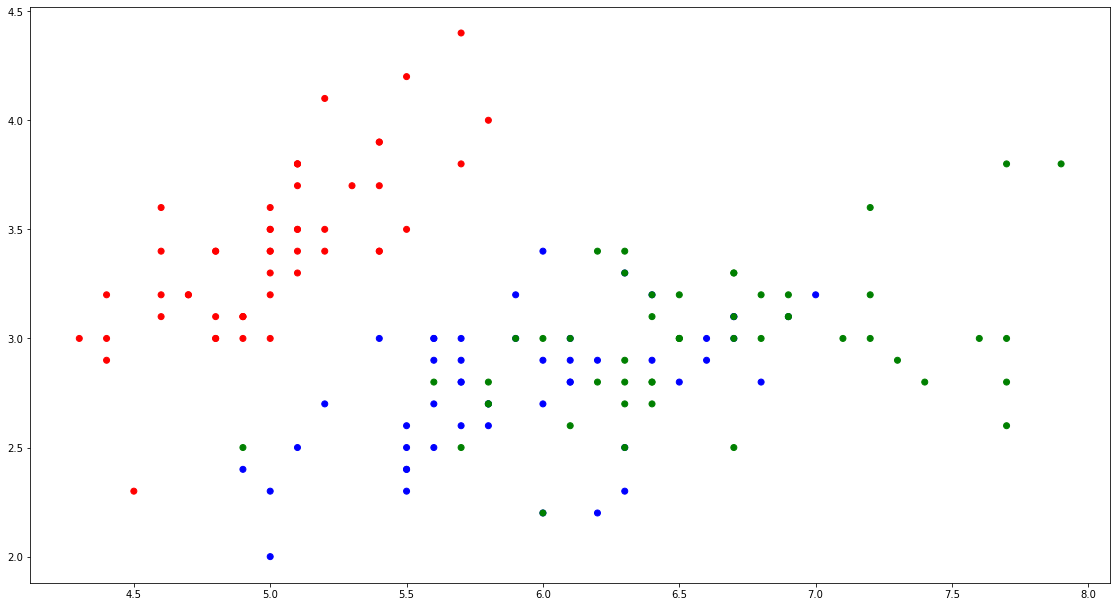

In [8]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_axes([0,0,1,1])

cores = ["red","green", "blue"]

ax.scatter(df["comprimento_sépala"], df["largura_sépala"], c = df["Cores"])

In [9]:
# Alternativa 2

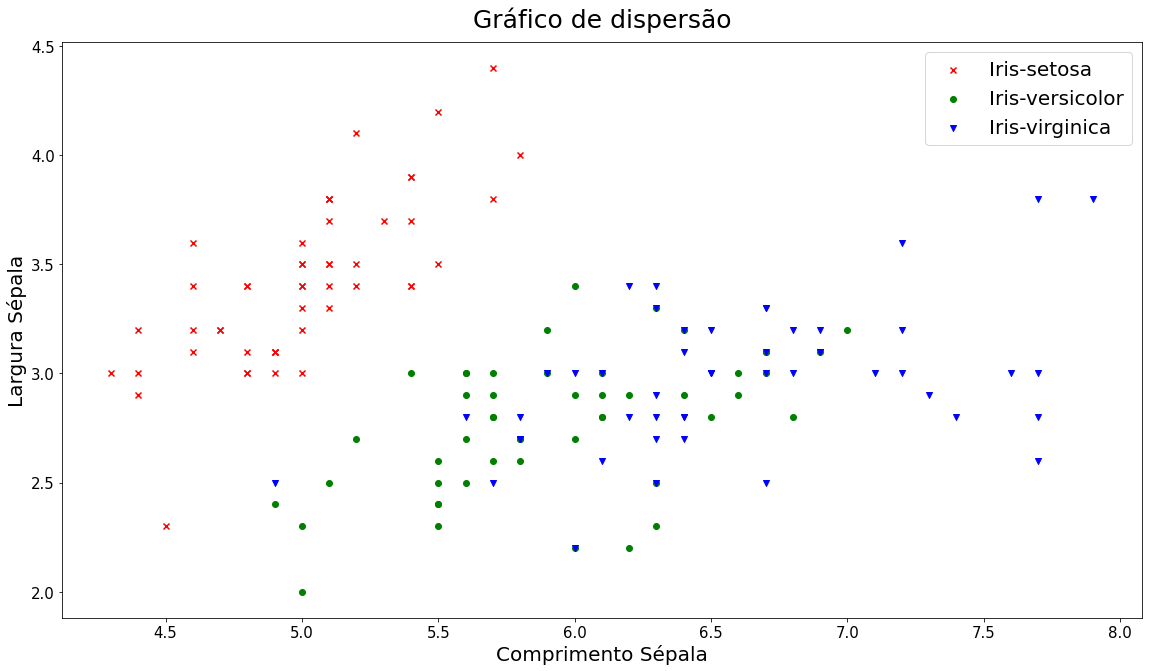

In [10]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_axes([0,0,1,1])

cores = {"Iris-setosa" : "red", "Iris-versicolor" : "green", "Iris-virginica" : "blue"}
marcadores = {"Iris-setosa" : "x", "Iris-versicolor" : "o", "Iris-virginica" : "v"}

for especie in df["espécie"].unique():
    tmp = df[df["espécie"] == especie]
    ax.scatter(tmp["comprimento_sépala"], tmp["largura_sépala"],
                color = cores[especie], marker = marcadores[especie] )
    
ax.set_title("Gráfico de dispersão", fontsize = 25, pad = 15)
ax.set_xlabel("Comprimento Sépala", fontsize = 20)
ax.set_ylabel("Largura Sépala", fontsize = 20)
ax.tick_params(labelsize = 15)
ax.legend(cores, fontsize = 20)

ax = ax

[Text(1, 0, 'comprimento_sépala'),
 Text(2, 0, 'largura_sépala'),
 Text(3, 0, 'comprimento_pétala'),
 Text(4, 0, 'largura_pétala')]

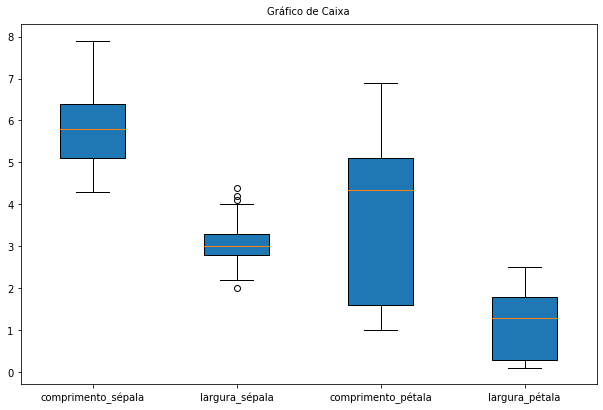

In [11]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])

ax.boxplot(df.drop(["espécie", "Cores"], axis = 1), patch_artist = True)
ax.set_title("Gráfico de Caixa", fontsize = 10, pad = 10)
ax.set_xticklabels(df.drop(["espécie", "Cores"], axis = 1).columns)

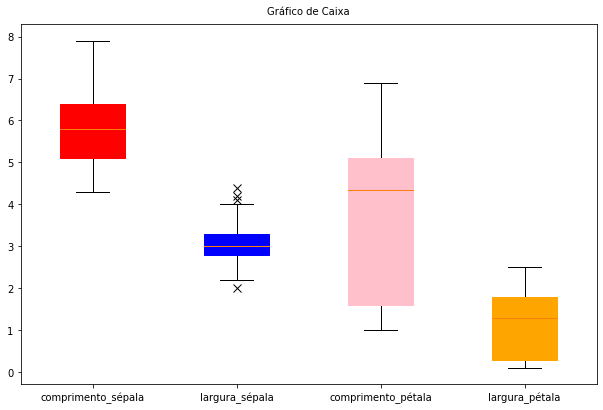

In [12]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])

cores = ["red", "blue", "pink", "orange"]

caixas = ax.boxplot(df.drop(["espécie", "Cores"], axis = 1), patch_artist = True)
ax.set_title("Gráfico de Caixa", fontsize = 10, pad = 10)
ax.set_xticklabels(df.drop(["espécie", "Cores"], axis = 1).columns)

for caixa, cor in zip(caixas["boxes"], cores):
    caixa.set(color = cor)
    
for outlier in caixas["fliers"]:
    outlier.set(marker = "x", markersize = 8)

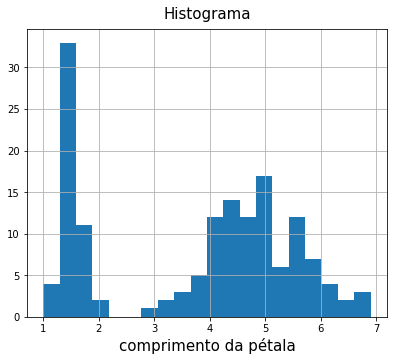

In [13]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_axes([0,0,1,1])

ax.hist(df["comprimento_pétala"], bins = 20)
ax.set_title("Histograma", fontsize = 15, pad = 10)
ax.set_xlabel("comprimento da pétala", fontsize = 15)
ax.grid(True)

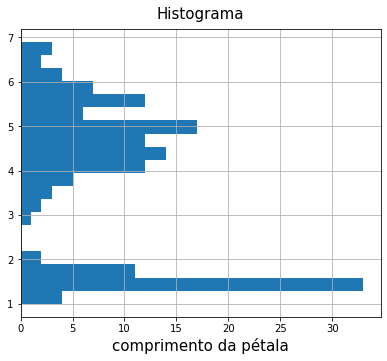

In [14]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_axes([0,0,1,1])

ax.hist(df["comprimento_pétala"], bins = 20, orientation = "horizontal")
ax.set_title("Histograma", fontsize = 15, pad = 10)
ax.set_xlabel("comprimento da pétala", fontsize = 15)
ax.grid(True)

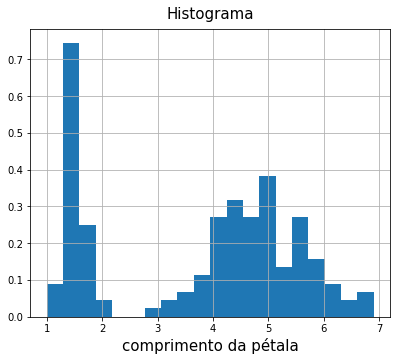

In [15]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_axes([0,0,1,1])

ax.hist(df["comprimento_pétala"], bins = 20, density = True)
ax.set_title("Histograma", fontsize = 15, pad = 10)
ax.set_xlabel("comprimento da pétala", fontsize = 15)
ax.grid(True)

Text(4.364420419952262, 28, 'mediana')

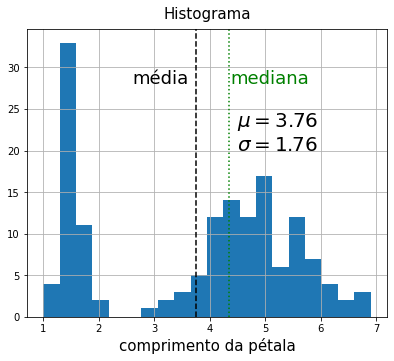

In [45]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_axes([0,0,1,1])

mu, sigma = df["comprimento_pétala"].mean(), df["comprimento_pétala"].std() 

ax.hist(df["comprimento_pétala"], bins = 20)
ax.set_title("Histograma", fontsize = 15, pad = 10)
ax.set_xlabel("comprimento da pétala", fontsize = 15)
ax.grid(True)

ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy = (4.5,20), fontsize = 20) # Escrevendo os símbolos de média e desvio padrão no gráfico. Os símbolos de $ são
                                            # para deixar o texto em itálico, a contrabarra para transformar em símbolo e a 
                                            # contra barra + n para dar um "enter". O resto é padrão para número decimal com
                                            # duas cadas decimais. 
                
ax.axvline(mu, color = "k", linestyle = "--") # traçar uma linha vertical no gráfico. 
ax.annotate("média", xy = (mu - 1.15,28), fontsize = 18) # colocar o nome "média" no gráfico

ax.axvline(df["comprimento_pétala"].median(), color = "g", linestyle = ":") # traçar uma linha vertical no gráfico. 
ax.annotate("mediana", xy = (sigma + 2.6, 28), fontsize = 18, color = "green") # colocar o nome "médiana" no gráfico